In [7]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV file
df = pd.read_csv(r'D:\ucl\pyssem\src\pyssem\utils\launch\data\FLM_steps.csv')
df['epoch_start_date'] = pd.to_datetime(df['epoch_start_date'])



D:\TEMP\ipykernel_16912\2717595198.py:27: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


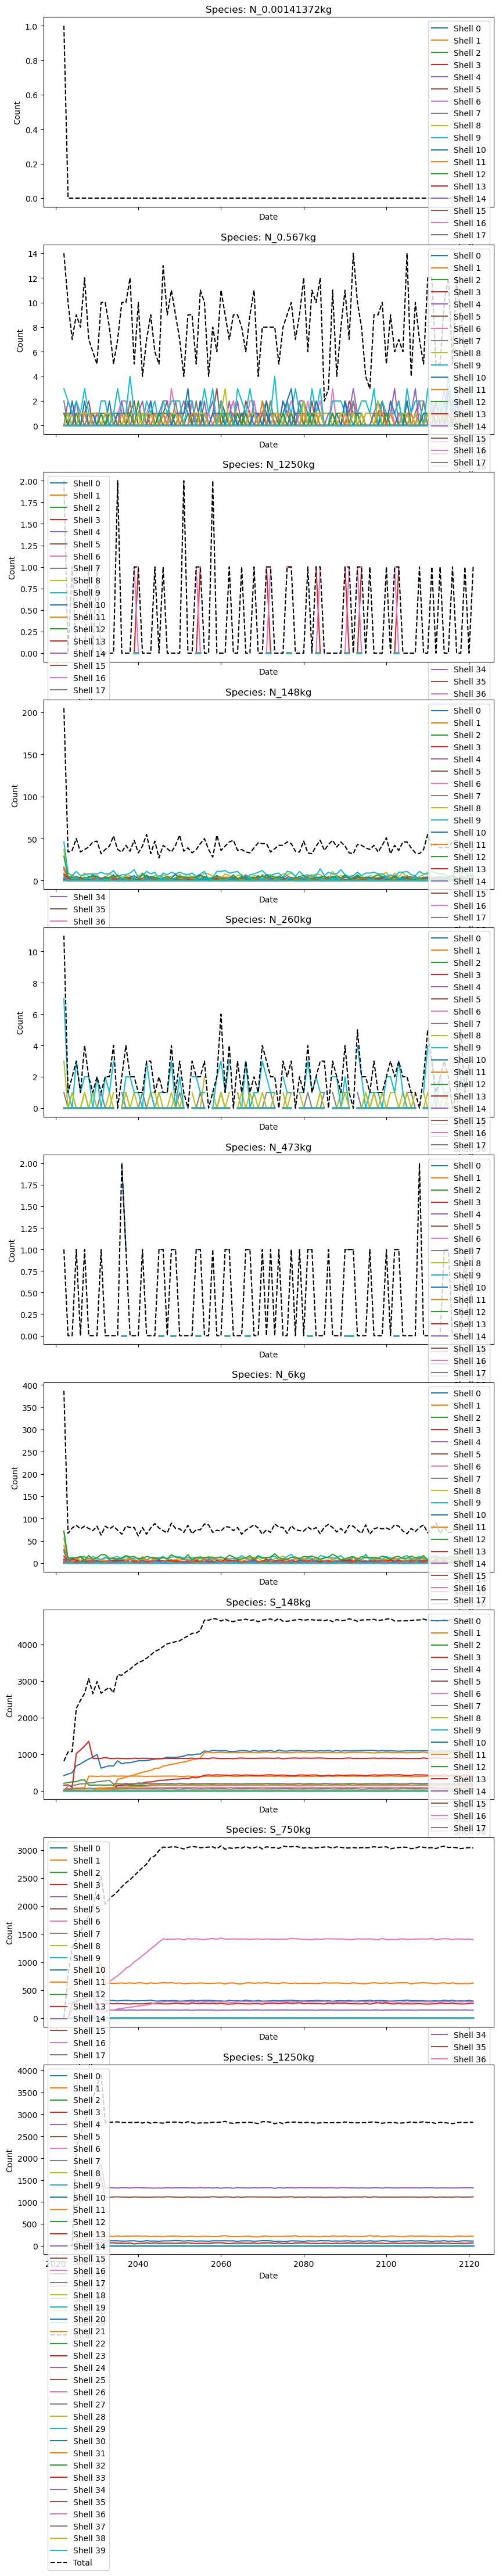

In [8]:
# Identify species columns, assuming they start with 'N_' and 'S_'
species_columns = [col for col in df.columns if col.startswith('N_') or col.startswith('S_')]

# Create subplots - one for each species
fig, axes = plt.subplots(len(species_columns), 1, figsize=(10, 5 * len(species_columns)), sharex=True)

# Check if axes is not an array (in case there's only one species)
if len(species_columns) == 1:
    axes = [axes]

# Loop over each species
for ax, species in zip(axes, species_columns):
    # Plot each orbital shell for this species
    for shell in df['alt_bin'].unique():
        subset = df[df['alt_bin'] == shell]
        ax.plot(subset['epoch_start_date'], subset[species], label=f'Shell {shell}')

    # Calculate and plot the total across all shells
    total = df.groupby('epoch_start_date')[species].sum()
    ax.plot(total.index, total.values, 'k--', label='Total')  # 'k--' is a black dashed line

    ax.set_title(f'Species: {species}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Count')
    ax.legend()

plt.tight_layout()
plt.show()